## SIMPLE LINEAR REGRESSIONS USING HEIGHT-WEIGHT DATASET

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import pearsonr
import statsmodels.api as sm

In [12]:
data=pd.read_csv("C:/Users/ELCOT/Downloads/weight-height.csv")

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd2b5788e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd2b585040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd2b578550>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd2b585760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd2b585af0>],
 'means': []}

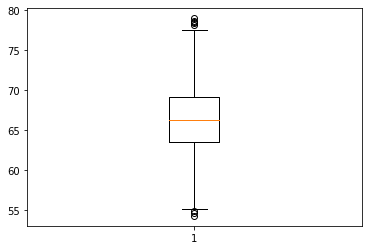

In [7]:
plt.boxplot(data.Height)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd2b5e98e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd2b5f7040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd2b5e9550>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd2b5f7760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd2b5f7af0>],
 'means': []}

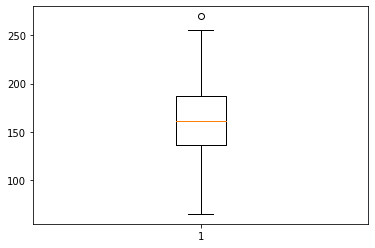

In [8]:
plt.boxplot(data.Weight)

In [10]:
pd.value_counts(data.Gender)

Male      5000
Female    5000
Name: Gender, dtype: int64

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 64.70012671,  85.22908389, 105.75804107, 126.28699825,
        146.81595543, 167.34491261, 187.87386979, 208.40282697,
        228.93178415, 249.46074133, 269.98969851]),
 <BarContainer object of 10 artists>)

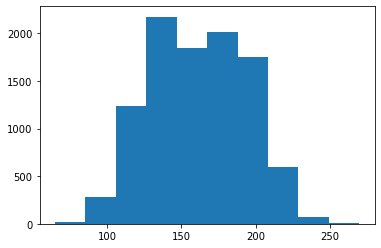

In [14]:
plt.hist(data.Weight)

In [15]:
stats.shapiro(data.Height)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960622191429138, pvalue=8.158031071868303e-16)

In [16]:
stats.shapiro(data.Weight)

ShapiroResult(statistic=0.9862456321716309, pvalue=5.538567140735469e-30)

In [17]:
data.shape

(10000, 3)

In [18]:
train=data.iloc[:8000]

In [19]:
test=data.iloc[8000:]

In [20]:
test.shape

(2000, 3)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

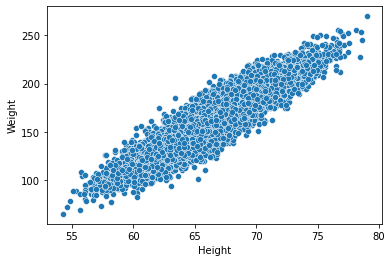

In [26]:
sns.scatterplot(x=data.Height,y=data.Weight,data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

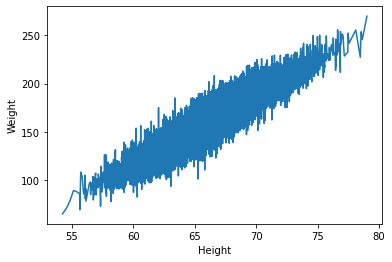

In [27]:
sns.lineplot(data.Height,data.Weight)

In [29]:

corr,tm= pearsonr(data.Height,data.Weight)

In [30]:
tm

0.0

In [31]:
corr

0.9247562987409135

In [33]:
train_x=train.Weight

In [34]:
train_x=sm.add_constant(train_x)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
train_y=train.Height

In [36]:
model=sm.OLS(train_y,train_x).fit()

In [37]:
model.params

const     48.336762
Weight     0.111404
dtype: float64

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 4.595e+04
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:22:50   Log-Likelihood:                -14453.
No. Observations:                8000   AIC:                         2.891e+04
Df Residuals:                    7998   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3368      0.089    544.981      0.000      48.163      48.511
Weight         0.1114      0.001    214.369      0.000       0.110       0.112
==============================================================================
Omnibus:                        6.719   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.718
Skew:                          -0.071   Prob(JB):                       0.0348
Kurtosis:                       3.003   Cond. No.                         919.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
predict=model.predict(train_x)

In [41]:
predict.tail()

7995    60.817916
7996    59.871260
7997    61.577258
7998    63.215065
7999    62.558061
dtype: float64